# 06-1 객체지향 API로 그래프 꾸미기

## pyplot 방식과 객체지향 API 방식

In [18]:
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 100

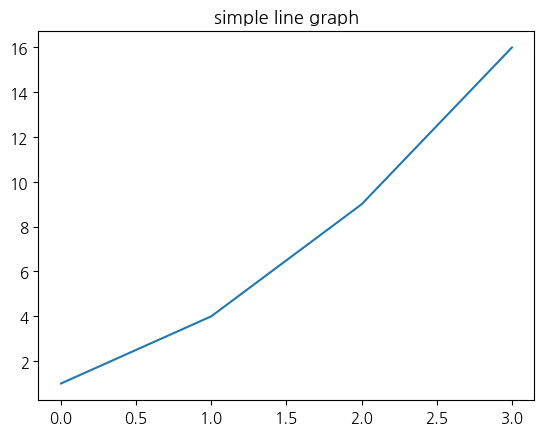

In [19]:
plt.plot([1, 4, 9, 16])
plt.title('simple line graph')
plt.show()

/var/folders/f2/hb4qppmx35lfxbhy2zgtc6640000gn/T/ipykernel_94573/1652707088.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


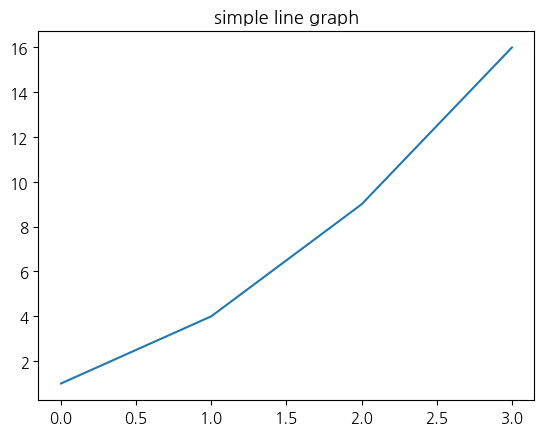

In [20]:
fig, ax = plt.subplots()
ax.plot([1, 4, 9, 16])
ax.set_title('simple line graph')
fig.show()

## 그래프에 한글 출력하기

In [21]:
# 노트북이 코랩에서 실행 중인지 체크합니다.
import sys
if 'google.colab' in sys.modules:
    !echo 'debconf debconf/frontend select Noninteractive' | debconf-set-selections
    # 나눔 폰트를 설치합니다.
    !sudo apt-get -qq -y install fonts-nanum
    import matplotlib.font_manager as fm
    fm._rebuild()
    
# 맥에서 그냥 설치
# https://hangeul.naver.com/font

In [22]:
import matplotlib.pyplot as plt

# 기본 dpi 설정 변경
plt.rcParams['figure.dpi'] = 100

In [23]:
plt.rcParams['font.family']

['NanumGothic']

In [24]:
# 나눔고딕 폰트를 사용합니다.
plt.rcParams['font.family'] = 'NanumGothic'

In [25]:
# rc 함수, [설정 그룹, 그룹의 하위 속성]
# 위와 동일하지만 이번에는 나눔바른고딕 폰트로 설정합니다.
plt.rc('font', family='NanumBarunGothic')

In [26]:
plt.rc('font', family='NanumBarunGothic', size=11)

In [27]:
plt.rc('font', family='NanumGothic', size=11)

In [28]:
print(plt.rcParams['font.family'], plt.rcParams['font.size'])

['NanumGothic'] 11.0


# 한글 폰트 못찾는 경우

In [29]:
# 1. 폰트 디렉토리 위치 출력 후, mpl-data/fons/ttf 에 폰트를 넣는다.
import matplotlib
matplotlib.matplotlib_fname()

# 2. 캐시 삭제,  tex.cache 폴더랑 fontList.json 파일 모두 삭제
matplotlib.get_cachedir()

# 3. 주피터 노트북 재시작 

'/Users/kangjuyoung/.matplotlib'

In [30]:
from matplotlib.font_manager import findSystemFonts
findSystemFonts()

['/System/Library/Fonts/Supplemental/Trebuchet MS Bold Italic.ttf',
 '/System/Library/Fonts/Supplemental/NotoSansEgyptianHieroglyphs-Regular.ttf',
 '/System/Library/Fonts/PingFang.ttc',
 '/System/Library/Fonts/Supplemental/NotoSansModi-Regular.ttf',
 '/System/Library/Fonts/Supplemental/Al Tarikh.ttc',
 '/System/Library/Fonts/Supplemental/Arial Narrow Bold.ttf',
 '/System/Library/Fonts/Supplemental/GujaratiMT.ttc',
 '/System/Library/Fonts/Supplemental/NotoSansBuhid-Regular.ttf',
 '/System/Library/Fonts/NotoNastaliq.ttc',
 '/System/Library/Fonts/Supplemental/Bodoni 72.ttc',
 '/System/Library/Fonts/Supplemental/Charter.ttc',
 '/System/Library/Fonts/Supplemental/Iowan Old Style.ttc',
 '/System/Library/Fonts/Apple Braille Pinpoint 6 Dot.ttf',
 '/System/Library/Fonts/Supplemental/Zapfino.ttf',
 '/System/Library/Fonts/Supplemental/DIN Alternate Bold.ttf',
 '/System/Library/Fonts/Supplemental/NotoSansKhudawadi-Regular.ttf',
 '/System/Library/Fonts/Supplemental/Courier New Italic.ttf',
 '/Syste

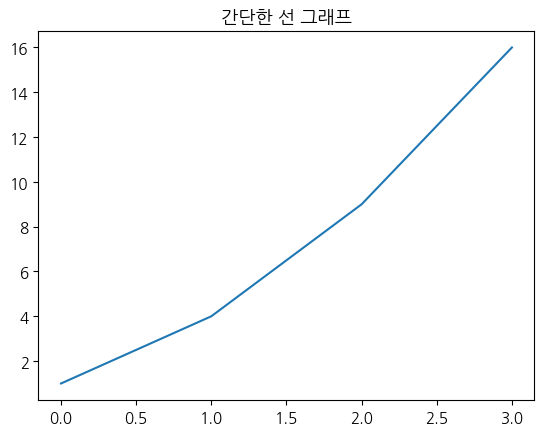

In [31]:
plt.plot([1, 4, 9, 16])
plt.title('간단한 선 그래프')
plt.show()

In [32]:
plt.rc('font', size=10)

## 출판사별 발행 도서 개수 산점도 그리기

In [33]:
import gdown

gdown.download('https://bit.ly/3pK7iuu', 'ns_book7.csv', quiet=False)

Downloading...
From: https://bit.ly/3pK7iuu
To: /Users/kangjuyoung/python-labs/data-analytics-jy/ch06/ns_book7.csv
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 53.8M/53.8M [00:01<00:00, 42.8MB/s]


'ns_book7.csv'

In [34]:
import pandas as pd

ns_book7 = pd.read_csv('ns_book7.csv', low_memory=False)
ns_book7.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


In [35]:
# 고유한 출판사 목록 별 카운트가 높은 순서대로 출력, 내림차순 정렬임으로 주의!
top30_pubs = ns_book7['출판사'].value_counts()[:30]
top30_pubs

문학동네           4410
민음사            3349
김영사            3246
웅진씽크빅          3227
시공사            2685
창비             2469
문학과지성사         2064
위즈덤하우스         1981
학지사            1877
한울             1553
한국학술정보         1496
열린책들           1491
살림출판사          1479
한길사            1460
博英社            1458
커뮤니케이션북스       1445
지식을만드는지식       1390
자음과모음          1364
비룡소            1331
랜덤하우스코리아       1314
넥서스            1310
황금가지           1101
길벗             1094
시그마프레스         1063
현암사            1054
다산북스           1046
집문당            1038
책세상            1037
한국문화사          1028
북이십일 21세기북스    1026
Name: 출판사, dtype: int64

In [36]:
# 특정 인덱스 배열에 속해있는 출판사라면 True
top30_pubs_idx = ns_book7['출판사'].isin(top30_pubs.index)
top30_pubs_idx

0          True
1         False
2         False
3         False
4          True
          ...  
376765    False
376766    False
376767     True
376768    False
376769    False
Name: 출판사, Length: 376770, dtype: bool

In [37]:
top30_pubs_idx.sum()

51886

In [38]:
# 데이터 프레임의 행을 무작위로 선택, random_state 매개변수는 seed 값 -> 동일한 값을 전달하면 항상 같은 결과
ns_book8 = ns_book7[top30_pubs_idx].sample(1000, random_state=42)
ns_book8.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
141760,155786,제갈량 문집,제갈량 지음 ;조영래 옮김,지식을만드는지식,2012,9788966805785,NaN,0,10,808,1,2,2013-04-10
249855,268595,존 레넌을 찾아서,토니 파슨스 지음;이은정 옮김,시공사,2007,9788952750419,NaN,0,NaN,843,1,18,2007-12-14
129347,142802,요리사 & 쇼핑호스트 :생활과학 계열·예체능 계열,와이즈멘토 글 ;김성희 그림,김영사,2013,9788934959854,9788934959717,7,14,321.55,1,3,2013-12-09
349194,371975,임정섭의 글쓰기 훈련소,임정섭 지음,다산북스,2017,9791130614472,NaN,NaN,NaN,NaN,1,0,1970-01-01
46734,51748,초한지 :이문열의 史記 이야기,지은이: 이문열,민음사,2017,9788937481659,9788937481581,0,7,813.6,1,9,2018-07-02


/var/folders/f2/hb4qppmx35lfxbhy2zgtc6640000gn/T/ipykernel_94573/4142255158.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


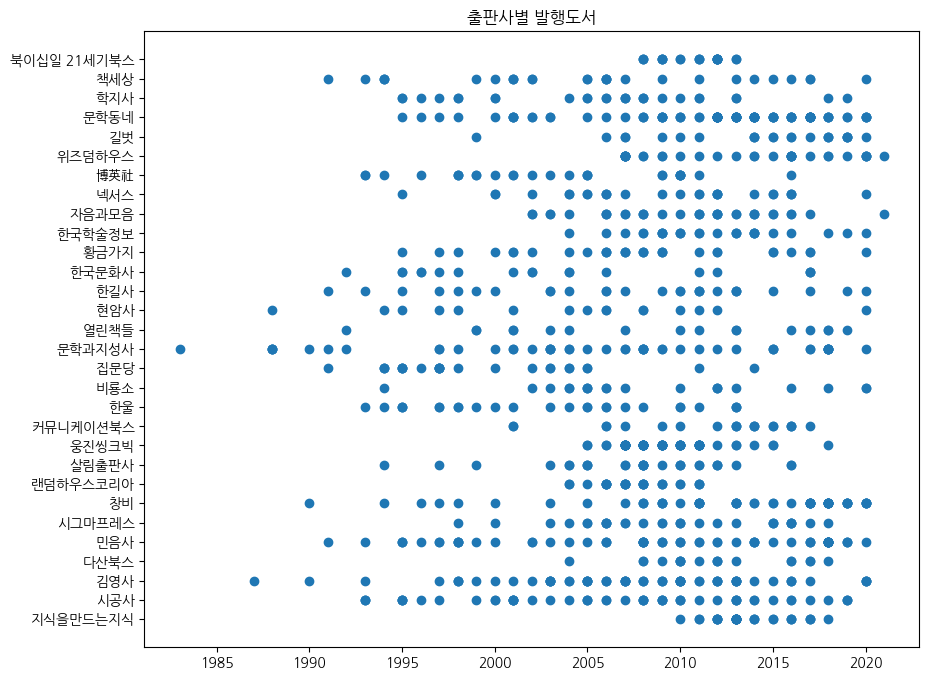

In [39]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(ns_book8['발행년도'], ns_book8['출판사'])
ax.set_title('출판사별 발행도서')
fig.show()

In [40]:
plt.rcParams['lines.markersize']

6.0

/var/folders/f2/hb4qppmx35lfxbhy2zgtc6640000gn/T/ipykernel_94573/394941104.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


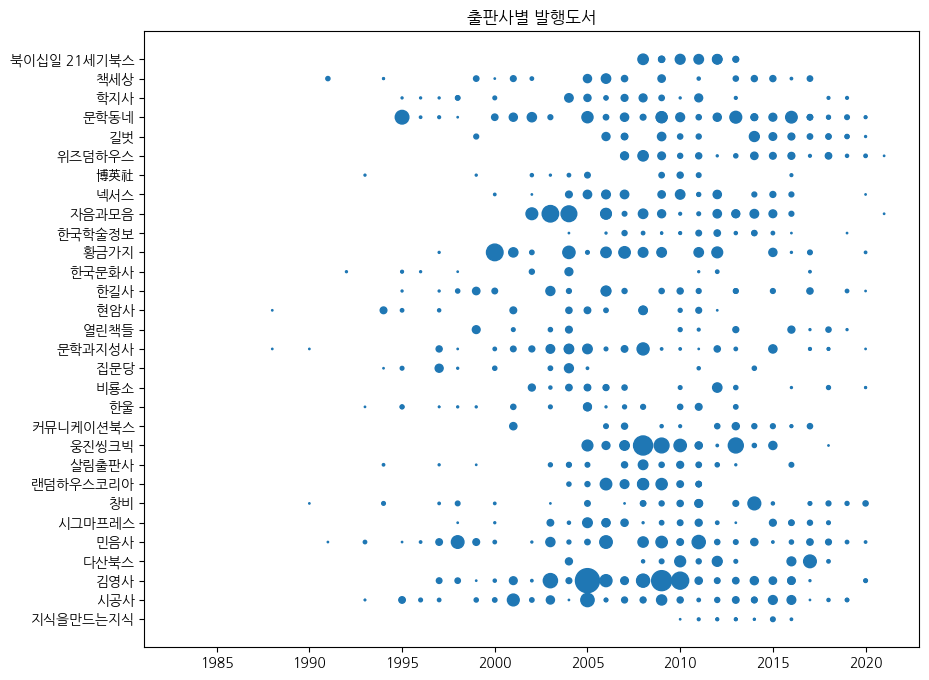

In [41]:
fig, ax = plt.subplots(figsize=(10, 8))
# x, y, s=marker 크기 지정
ax.scatter(ns_book8['발행년도'], ns_book8['출판사'], s=ns_book8['대출건수'])
ax.set_title('출판사별 발행도서')
fig.show()

/var/folders/f2/hb4qppmx35lfxbhy2zgtc6640000gn/T/ipykernel_94573/2464177533.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


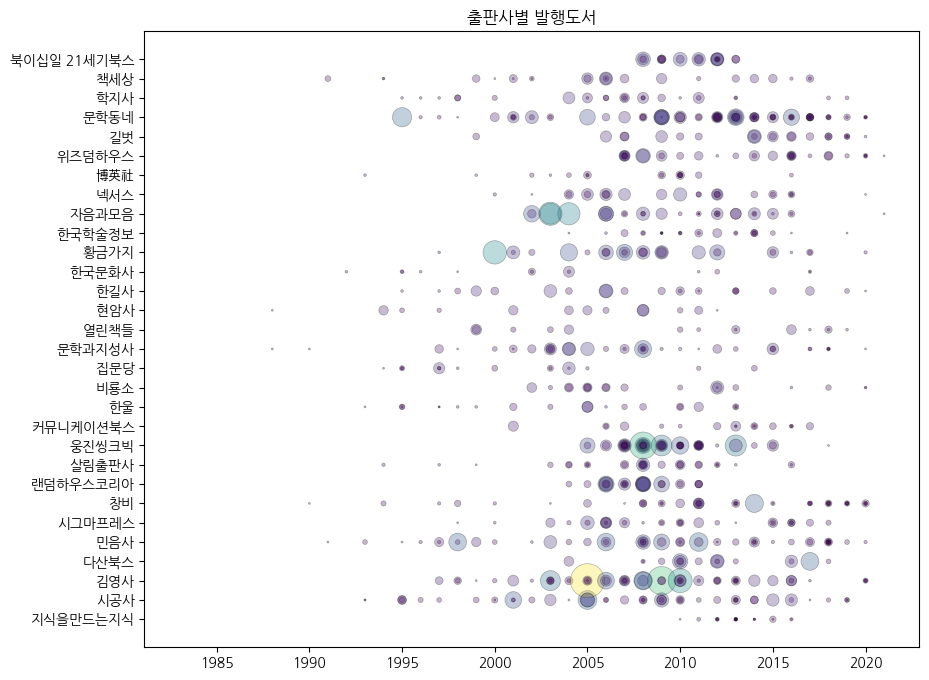

In [42]:
fig, ax = plt.subplots(figsize=(10, 8))

# alpha: 투명도
# edgecolor: 마커 테두리 색
# linewidths: 테두리 선의 두께
# c: 산점도의 색, (ex 큰 값의 경우 노란, 낮으면 녹색)
# s: 마커 크기
ax.scatter(ns_book8['발행년도'], ns_book8['출판사'], 
           linewidths=0.5, edgecolors='k', alpha=0.3,
           s=ns_book8['대출건수']*2, c=ns_book8['대출건수'])
ax.set_title('출판사별 발행도서')
fig.show()

# Color map 예시

/var/folders/f2/hb4qppmx35lfxbhy2zgtc6640000gn/T/ipykernel_94573/1301357350.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


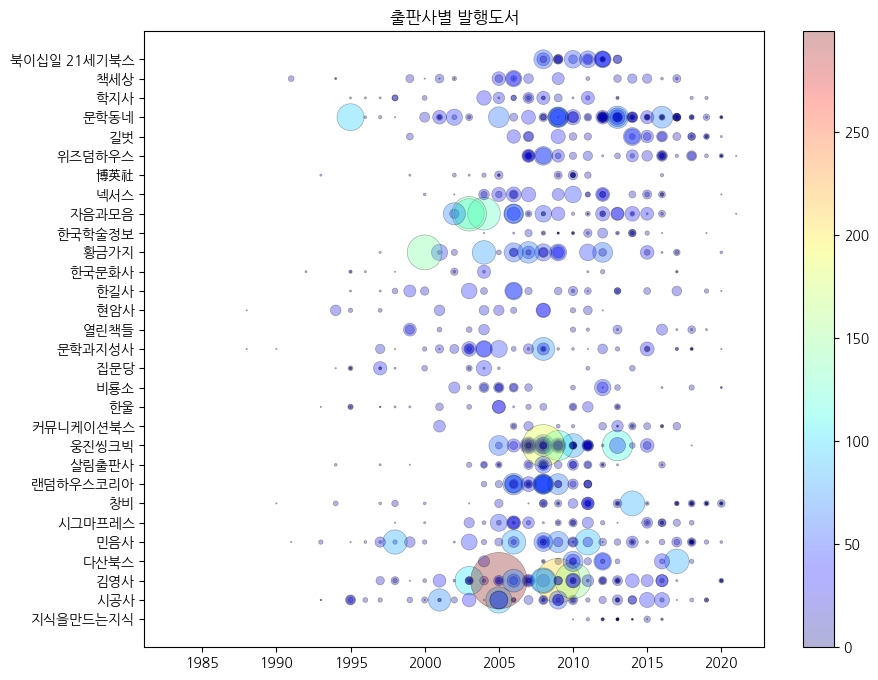

In [46]:
fig, ax = plt.subplots(figsize=(10, 8))

sc = ax.scatter(ns_book8['발행년도'], ns_book8['출판사'], 
                linewidths=0.5, edgecolors='k', alpha=0.3,
                s=ns_book8['대출건수']**1.3, c=ns_book8['대출건수'], 
                # jet 컬러맵을 사용
                cmap='jet')
ax.set_title('출판사별 발행도서')

# 컬러맵을 figure에 표시
fig.colorbar(sc)

fig.show()

# 06-2 맷플롯립의 고급 기능 배우기

In [47]:
import gdown

gdown.download('https://bit.ly/3pK7iuu', 'ns_book7.csv', quiet=False)

Downloading...
From: https://bit.ly/3pK7iuu
To: /Users/kangjuyoung/python-labs/data-analytics-jy/ch06/ns_book7.csv
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 53.8M/53.8M [00:01<00:00, 48.1MB/s]


'ns_book7.csv'

In [48]:
import pandas as pd

ns_book7 = pd.read_csv('ns_book7.csv', low_memory=False)
ns_book7.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


## 하나의 피겨에 여러 개의 선 그래프 그리기

In [49]:
# 출판사 빈도수를 구하고 30위까지 추출
top30_pubs = ns_book7['출판사'].value_counts()[:30]

In [77]:
top30_pubs

문학동네           4410
민음사            3349
김영사            3246
웅진씽크빅          3227
시공사            2685
창비             2469
문학과지성사         2064
위즈덤하우스         1981
학지사            1877
한울             1553
한국학술정보         1496
열린책들           1491
살림출판사          1479
한길사            1460
博英社            1458
커뮤니케이션북스       1445
지식을만드는지식       1390
자음과모음          1364
비룡소            1331
랜덤하우스코리아       1314
넥서스            1310
황금가지           1101
길벗             1094
시그마프레스         1063
현암사            1054
다산북스           1046
집문당            1038
책세상            1037
한국문화사          1028
북이십일 21세기북스    1026
Name: 출판사, dtype: int64

In [79]:
# index 기준으로 특정 출판사 데이터프레임 추출
top30_pubs_idx = ns_book7['출판사'].isin(top30_pubs.index)
top30_pubs_idx

0          True
1         False
2         False
3         False
4          True
          ...  
376765    False
376766    False
376767     True
376768    False
376769    False
Name: 출판사, Length: 376770, dtype: bool

In [80]:
ns_book9 = ns_book7[top30_pubs_idx][['출판사', '발행년도', '대출건수']]
ns_book9

,출판사,발행년도,대출건수
0,민음사,2021,0
4,김영사,2021,0
23,문학동네,2021,0
24,한길사,2021,0
39,현암사,2021,0
...,...,...,...
376738,문학과지성사,1983,0
376739,문학과지성사,1983,0
376755,시공사,1995,0
376762,집문당,1990,0


In [82]:
# groupby: 열을 기준으로 행을 모음
# 출판사, 발행년도열을 기준으로 행을 모으고 개수 더함
ns_book9 = ns_book9.groupby(by=['출판사', '발행년도']).sum()
ns_book9

대출건수
출판사  발행년도      
博英社  1947     0
     1975     0
     1977     0
     1986     1
     1987     1
...         ...
황금가지 2018   200
     2019   133
     2020    98
     2021     1
     2030     2

[886 rows x 1 columns]

In [83]:
ns_book9 = ns_book9.reset_index()
ns_book9[ns_book9['출판사'] == '황금가지'].head()

,출판사,발행년도,대출건수
858,황금가지,1995,0
859,황금가지,1996,67
860,황금가지,1997,116
861,황금가지,1998,526
862,황금가지,1999,505


In [52]:
line1 = ns_book9[ns_book9['출판사'] == '황금가지']
line2 = ns_book9[ns_book9['출판사'] == '비룡소']

/var/folders/f2/hb4qppmx35lfxbhy2zgtc6640000gn/T/ipykernel_94573/1164434814.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


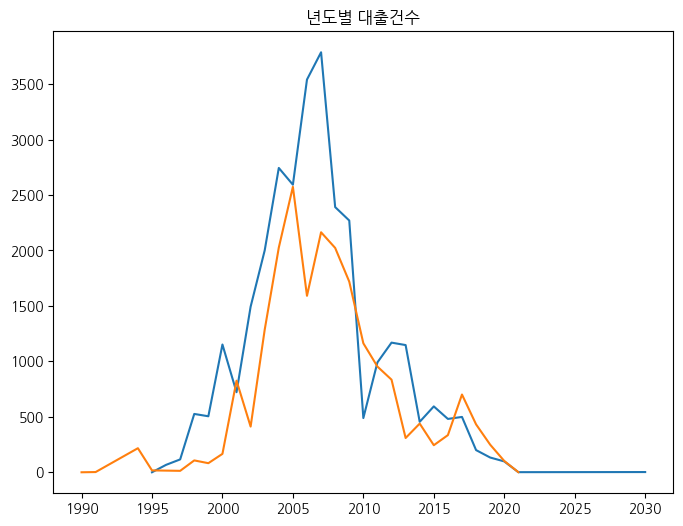

In [53]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(line1['발행년도'], line1['대출건수'])
ax.plot(line2['발행년도'], line2['대출건수'])
ax.set_title('년도별 대출건수')
fig.show()

/var/folders/f2/hb4qppmx35lfxbhy2zgtc6640000gn/T/ipykernel_94573/1746861815.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


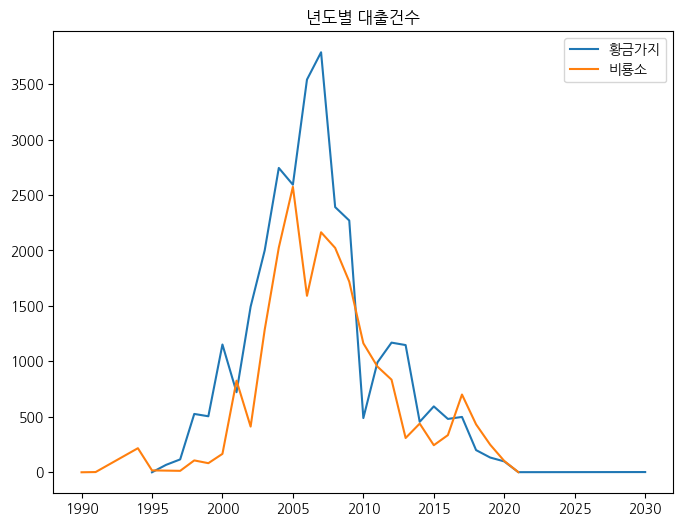

In [54]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(line1['발행년도'], line1['대출건수'], label='황금가지')
ax.plot(line2['발행년도'], line2['대출건수'], label='비룡소')
ax.set_title('년도별 대출건수')
# 범례 추가
ax.legend()
fig.show()

/var/folders/f2/hb4qppmx35lfxbhy2zgtc6640000gn/T/ipykernel_94573/3034620046.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


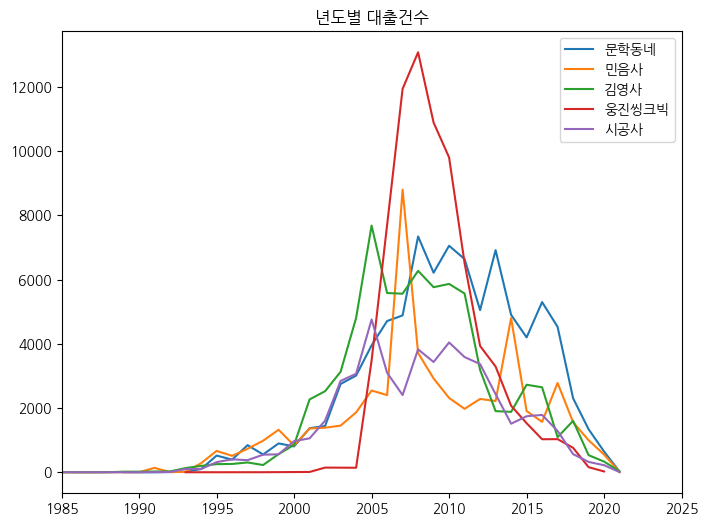

In [55]:
fig, ax = plt.subplots(figsize=(8, 6))
for pub in top30_pubs.index[:5]:
    line = ns_book9[ns_book9['출판사'] == pub]
    ax.plot(line['발행년도'], line['대출건수'], label=pub)
ax.set_title('년도별 대출건수')

# 범레 표시
ax.legend()

# x축 리밋 설정, 대신 plt.axis 사용해도 되지만 한쪽만 수정할 수 없어 이 경우에는 적합하지 않음.
ax.set_xlim(1985, 2025)

fig.show()

In [86]:
ns_book9

,출판사,발행년도,대출건수
0,博英社,1947,0
1,博英社,1975,0
2,博英社,1977,0
3,博英社,1986,1
4,博英社,1987,1
...,...,...,...
881,황금가지,2018,200
882,황금가지,2019,133
883,황금가지,2020,98
884,황금가지,2021,1


In [56]:
# 출판사를 index로 발행년도를 column 으로 데이터 구조를 바꿈
# fill_value 으로 누락값을 초기화해주면 추후에 데이터프레임.fillna(0) 할 필요 없음.
ns_book10 = ns_book9.pivot_table(index='출판사', columns='발행년도', fill_value=0)
ns_book10.head()

대출건수                                               ...                  \
발행년도 1947 1974 1975 1976 1977 1978 1979 1980 1981 1982  ...    2013    2014   
출판사                                                     ...                   
博英社   0.0  NaN  0.0  NaN  0.0  NaN  NaN  NaN  NaN  NaN  ...     NaN   118.0   
길벗    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  1162.0  1619.0   
김영사   NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.0  0.0  ...  1905.0  1881.0   
넥서스   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  1828.0  1429.0   
다산북스  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  ...  1100.0  1361.0   

                                                               
발행년도    2015    2016    2017    2018   2019   2020  2021 2030  
출판사                                                            
博英社     57.0    47.0     2.0     8.0    NaN    1.0   NaN  NaN  
길벗    1410.0  1597.0  1626.0  1004.0  773.0  292.0  12.0  NaN  
김영사   2726.0  2647.0  1094.0  1602.0  533.0  332.0  30.0  NaN  
넥서스    765.0  1146.0   932.0   565.0   90.0   15.0   0.0  NaN  
다산북스  1321.0  1137.0  1249.0   773.0  530.0  127.0  13.0  NaN  

[5 rows x 50 columns]

In [57]:
# 대출건수, column 이 열임
ns_book10.columns[:10]

MultiIndex([('대출건수', 1947),
            ('대출건수', 1974),
            ('대출건수', 1975),
            ('대출건수', 1976),
            ('대출건수', 1977),
            ('대출건수', 1978),
            ('대출건수', 1979),
            ('대출건수', 1980),
            ('대출건수', 1981),
            ('대출건수', 1982)],
           names=[None, '발행년도'])

In [84]:
top10_pubs = top30_pubs.index[:10]
top10_pubs

Index(['문학동네', '민음사', '김영사', '웅진씽크빅', '시공사', '창비', '문학과지성사', '위즈덤하우스', '학지사',
       '한울'],
      dtype='object')

In [85]:
# 열 2개 중에 1번째(년도) 만 가져옴
year_cols = ns_book10.columns.get_level_values(1)
year_cols

Int64Index([1947, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
            1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994,
            1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
            2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
            2017, 2018, 2019, 2020, 2021, 2030],
           dtype='int64', name='발행년도')

In [117]:
ns_book9.head()

,출판사,발행년도,대출건수
0,博英社,1947,0
1,博英社,1975,0
2,博英社,1977,0
3,博英社,1986,1
4,博英社,1987,1


In [118]:
# 아래 처럼 하면 나중에 get_level_values 설정할 필요 없음
ns_book10_2 = ns_book9.pivot_table(index='발행년도', columns='출판사', values='대출건수')
ns_book10_2.fillna(0)[ns_book10_2.index > 2005].head()

출판사,博英社,길벗,김영사,넥서스,다산북스,랜덤하우스코리아,문학과지성사,문학동네,민음사,북이십일 21세기북스,...,창비,책세상,커뮤니케이션북스,학지사,한국문화사,한국학술정보,한길사,한울,현암사,황금가지
발행년도,,,,,,,,,,,,,,,,,,,,,
2006,804.0,1318.0,5583.0,2884.0,711.0,2986.0,1733.0,4710.0,2404.0,407.0,...,2485.0,964.0,1106.0,1951.0,194.0,312.0,2615.0,557.0,630.0,3541.0
2007,781.0,2328.0,5562.0,1311.0,1092.0,8435.0,1495.0,4886.0,8802.0,1107.0,...,1864.0,722.0,1018.0,2273.0,245.0,403.0,1086.0,927.0,593.0,3787.0
2008,560.0,1889.0,6274.0,1648.0,2073.0,9548.0,1472.0,7345.0,3715.0,2703.0,...,2442.0,356.0,499.0,2820.0,162.0,286.0,2418.0,730.0,865.0,2391.0
2009,760.0,1613.0,5764.0,1419.0,2760.0,6457.0,1203.0,6215.0,2922.0,3927.0,...,3028.0,662.0,241.0,1558.0,231.0,489.0,727.0,747.0,364.0,2270.0
2010,978.0,954.0,5866.0,1292.0,2481.0,6446.0,1295.0,7055.0,2314.0,3864.0,...,2385.0,511.0,404.0,1926.0,181.0,1206.0,587.0,624.0,611.0,489.0


# 스택 영역 그래프

/var/folders/f2/hb4qppmx35lfxbhy2zgtc6640000gn/T/ipykernel_94573/1639555673.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


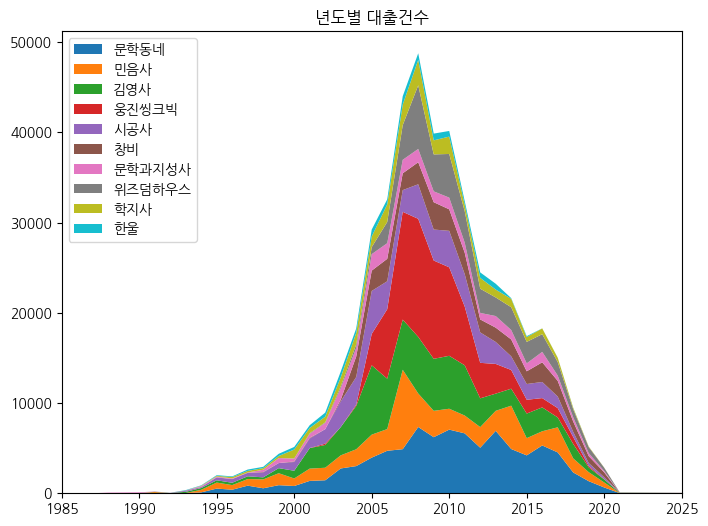

In [59]:
fig, ax = plt.subplots(figsize=(8, 6))
# 위에서 추출한 year_cols 을 x축
ax.stackplot(year_cols, ns_book10.loc[top10_pubs].fillna(0), labels=top10_pubs)
# ns_book10[ns_book10.loc[top10_pubs].fillna(0)].plot.area(ax=ax, title='년도별 대출건수', xlim=(1985, 2025)))

ax.set_title('년도별 대출건수')
# 왼쪽에 표시
ax.legend(loc='upper left')

# x 축 limit 설정
ax.set_xlim(1985, 2025)
fig.show()

- 면적으로 값을 추측하면 됨. 위에서는 문학 동네와 웅진씽크빅의 대출 건수가 높은 것을 추측할 수 있음

## 하나의 피겨에 여러 개의 막대 그래프 그리기

/var/folders/f2/hb4qppmx35lfxbhy2zgtc6640000gn/T/ipykernel_94573/536795627.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


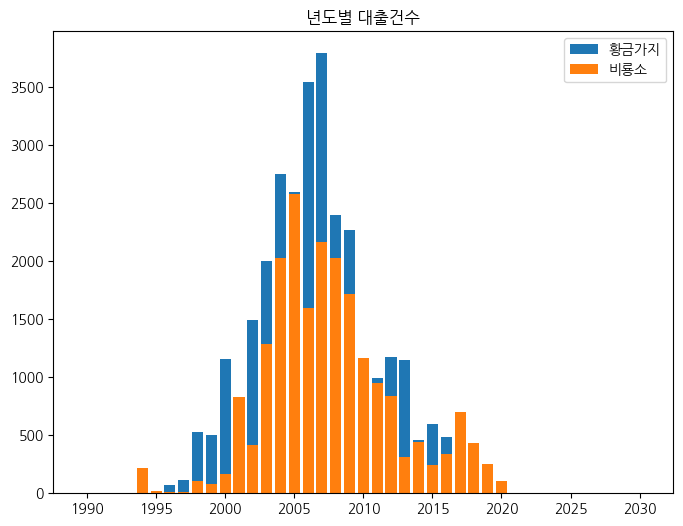

In [60]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(line1['발행년도'], line1['대출건수'], label='황금가지')
ax.bar(line2['발행년도'], line2['대출건수'], label='비룡소')
ax.set_title('년도별 대출건수')
ax.legend()
fig.show()

# 나란히 옆으로 그리기

/var/folders/f2/hb4qppmx35lfxbhy2zgtc6640000gn/T/ipykernel_94573/654794341.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


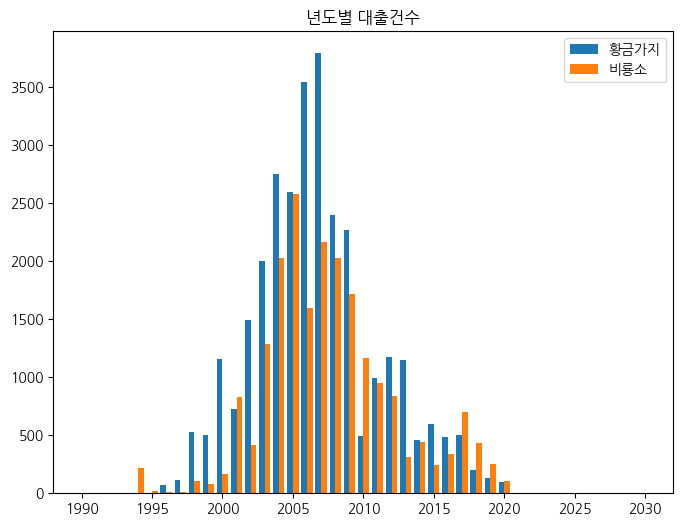

In [61]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(line1['발행년도']-0.2, line1['대출건수'], width=0.4, label='황금가지')
ax.bar(line2['발행년도']+0.2, line2['대출건수'], width=0.4, label='비룡소')
ax.set_title('년도별 대출건수')
ax.legend()
fig.show()

# 스택 막대 그래프
- 맷플롯립에는 스택 막대 그래프 기능을 제공하지 않음
- bottom 매개변수로 수동으로 위치를 지정해야함

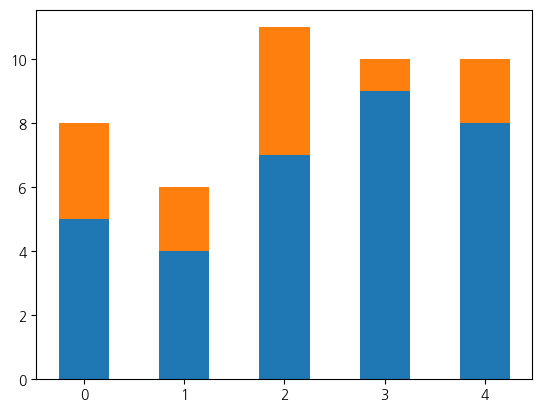

In [62]:
height1 = [5, 4, 7, 9, 8]
height2 = [3, 2, 4, 1, 2]

plt.bar(range(5), height1, width=0.5)
plt.bar(range(5), height2, bottom=height1, width=0.5)
plt.show()

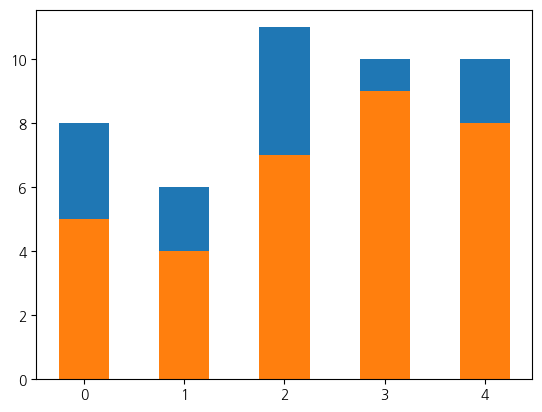

In [63]:
# zip: 여러 개의 순회 가능한(iterable) 객체를 인자로 받고, 
# 각 객체가 담고 있는 원소를 튜플의 형태로 차례로 접근할 수 있는 반복자(iterator)를 반환
# 원소끼리 더한 배열
height3 = [a + b for a, b in zip(height1, height2)]

plt.bar(range(5), height3, width=0.5)
plt.bar(range(5), height1, width=0.5)
plt.show()

### 데이터값 누적하여 그리기

In [64]:
ns_book10.loc[top10_pubs[:5], ('대출건수',2013):('대출건수',2020)]

대출건수                                                       
발행년도     2013    2014    2015    2016    2017    2018    2019   2020
문학동네   6919.0  4904.0  4201.0  5301.0  4529.0  2306.0  1340.0  645.0
민음사    2219.0  4805.0  1907.0  1571.0  2782.0  1559.0   998.0  552.0
김영사    1905.0  1881.0  2726.0  2647.0  1094.0  1602.0   533.0  332.0
웅진씽크빅  3293.0  2072.0  1529.0  1029.0  1032.0   762.0   159.0   26.0
시공사    2433.0  1512.0  1745.0  1787.0  1287.0   566.0   322.0  221.0

In [91]:
ns_book10.loc[top10_pubs[:5], ('대출건수',2013):('대출건수',2020)].cumsum()

대출건수                                                            
발행년도      2013     2014     2015     2016     2017    2018    2019    2020
문학동네    6919.0   4904.0   4201.0   5301.0   4529.0  2306.0  1340.0   645.0
민음사     9138.0   9709.0   6108.0   6872.0   7311.0  3865.0  2338.0  1197.0
김영사    11043.0  11590.0   8834.0   9519.0   8405.0  5467.0  2871.0  1529.0
웅진씽크빅  14336.0  13662.0  10363.0  10548.0   9437.0  6229.0  3030.0  1555.0
시공사    16769.0  15174.0  12108.0  12335.0  10724.0  6795.0  3352.0  1776.0

In [92]:
# 행을 따라 값을 누적, 아래 데이터를 보면 열 방향으로 값이 누적되어 가는 것을 볼 수 있다.
ns_book12 = ns_book10.loc[top10_pubs].cumsum()
ns_book12

대출건수                                                ...           \
발행년도   1947 1974 1975 1976 1977 1978 1979 1980  1981 1982  ...     2013   
문학동네    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...   6919.0   
민음사     NaN  1.0  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...   9138.0   
김영사     NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0   0.0  0.0  ...  11043.0   
웅진씽크빅   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...  14336.0   
시공사     NaN  NaN  NaN  NaN  NaN  NaN  0.0  NaN   NaN  NaN  ...  16769.0   
창비      NaN  NaN  NaN  0.0  0.0  2.0  NaN  NaN   NaN  1.0  ...  18356.0   
문학과지성사  NaN  NaN  NaN  NaN  1.0  NaN  7.0  NaN  20.0  NaN  ...  19641.0   
위즈덤하우스  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...  21702.0   
학지사     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...  22574.0   
한울      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...  23220.0   

                                                                                
발행년도       2014     2015     2016     2017    2018    2019    2020   2021 2030  
문학동네     4904.0   4201.0   5301.0   4529.0  2306.0  1340.0   645.0   18.0  NaN  
민음사      9709.0   6108.0   6872.0   7311.0  3865.0  2338.0  1197.0   25.0  NaN  
김영사     11590.0   8834.0   9519.0   8405.0  5467.0  2871.0  1529.0   55.0  NaN  
웅진씽크빅   13662.0  10363.0  10548.0   9437.0  6229.0  3030.0  1555.0    NaN  NaN  
시공사     15174.0  12108.0  12335.0  10724.0  6795.0  3352.0  1776.0   60.0  NaN  
창비      17046.0  13519.0  14515.0  12459.0  7947.0  4120.0  2313.0   72.0  NaN  
문학과지성사  18092.0  14393.0  15670.0  13046.0  8418.0  4450.0  2464.0   77.0  NaN  
위즈덤하우스  20617.0  16777.0  17631.0  14542.0  9312.0  5123.0  2829.0  100.0  NaN  
학지사     21550.0  17303.0  18271.0  15015.0  9463.0  5182.0  2844.0    NaN  NaN  
한울      21622.0  17411.0  18276.0  15030.0  9484.0     NaN     NaN    NaN  NaN  

[10 rows x 50 columns]

In [94]:
testcumsumaxis = ns_book10.loc[top10_pubs].cumsum(axis=1)
testcumsumaxis

대출건수                                                ...           \
발행년도   1947 1974 1975 1976 1977 1978 1979 1980  1981 1982  ...     2013   
문학동네    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...  65492.0   
민음사     NaN  1.0  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...  40747.0   
김영사     NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0   0.0  0.0  ...  63006.0   
웅진씽크빅   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...  70938.0   
시공사     NaN  NaN  NaN  NaN  NaN  NaN  0.0  NaN   NaN  NaN  ...  42928.0   
창비      NaN  NaN  NaN  0.0  0.0  2.0  NaN  NaN   NaN  3.0  ...  22626.0   
문학과지성사  NaN  NaN  NaN  NaN  1.0  NaN  8.0  NaN  28.0  NaN  ...  17183.0   
위즈덤하우스  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...  31931.0   
학지사     NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...  19821.0   
한울      NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  NaN  ...   8964.0   

                                                                       \
발행년도       2014     2015     2016     2017     2018     2019     2020   
문학동네    70396.0  74597.0  79898.0  84427.0  86733.0  88073.0  88718.0   
민음사     45552.0  47459.0  49030.0  51812.0  53371.0  54369.0  54921.0   
김영사     64887.0  67613.0  70260.0  71354.0  72956.0  73489.0  73821.0   
웅진씽크빅   73010.0  74539.0  75568.0  76600.0  77362.0  77521.0  77547.0   
시공사     44440.0  46185.0  47972.0  49259.0  49825.0  50147.0  50368.0   
창비      24498.0  25909.0  28089.0  29824.0  30976.0  31744.0  32281.0   
문학과지성사  18229.0  19103.0  20258.0  20845.0  21316.0  21646.0  21797.0   
위즈덤하우스  34456.0  36840.0  38801.0  40297.0  41191.0  41864.0  42229.0   
학지사     20754.0  21280.0  21920.0  22393.0  22544.0  22603.0  22618.0   
한울       9036.0   9144.0   9149.0   9164.0   9185.0      NaN      NaN   

                      
발행년도       2021 2030  
문학동네    88736.0  NaN  
민음사     54928.0  NaN  
김영사     73851.0  NaN  
웅진씽크빅       NaN  NaN  
시공사     50373.0  NaN  
창비      32293.0  NaN  
문학과지성사  21802.0  NaN  
위즈덤하우스  42252.0  NaN  
학지사         NaN  NaN  
한울          NaN  NaN  

[10 rows x 50 columns]

/var/folders/f2/hb4qppmx35lfxbhy2zgtc6640000gn/T/ipykernel_94573/478610987.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


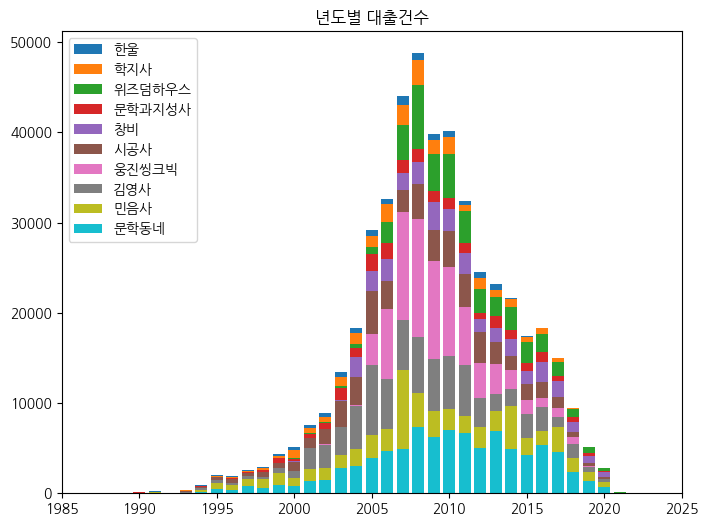

In [93]:
fig, ax = plt.subplots(figsize=(8, 6))
# 큰 값부터 표시해야 막대를 덮어쓰지 않기 때문에, 배열을 반대로 만들어서 표시.
for i in reversed(range(len(ns_book12))):
    bar = ns_book12.iloc[i]     # 행 추출
    label = ns_book12.index[i]  # 출판사 이름 추출
    ax.bar(year_cols, bar, label=label)
ax.set_title('년도별 대출건수')
ax.legend(loc='upper left')
ax.set_xlim(1985, 2025)
fig.show()

## 원(파이차트) 그래프 그리기

In [68]:
data = top30_pubs[:10]
# 인덱스만 저장(출판사)
labels = top30_pubs.index[:10]

/var/folders/f2/hb4qppmx35lfxbhy2zgtc6640000gn/T/ipykernel_94573/434946793.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


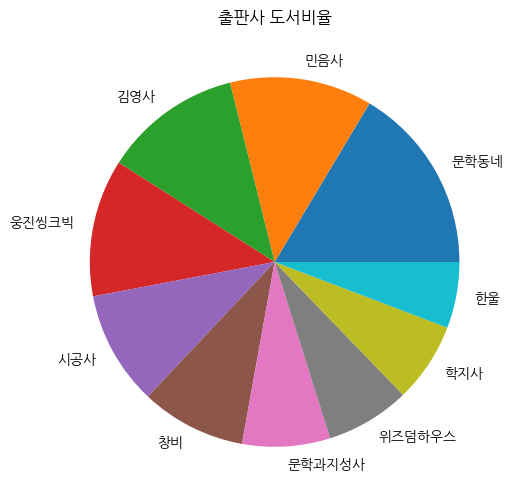

In [69]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(data, labels=labels)
ax.set_title('출판사 도서비율')
fig.show()

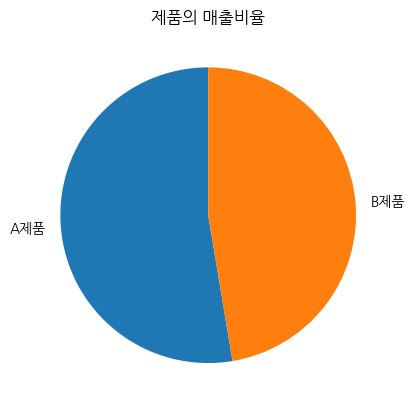

In [96]:
# 12시 방향부터 원 그래프를 그리도록 설정, 데이터 차이를 명확하게 알 수 있음
plt.pie([10,9], labels=['A제품', 'B제품'], startangle=90)
plt.title('제품의 매출비율')
plt.show()

/var/folders/f2/hb4qppmx35lfxbhy2zgtc6640000gn/T/ipykernel_94573/419741819.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


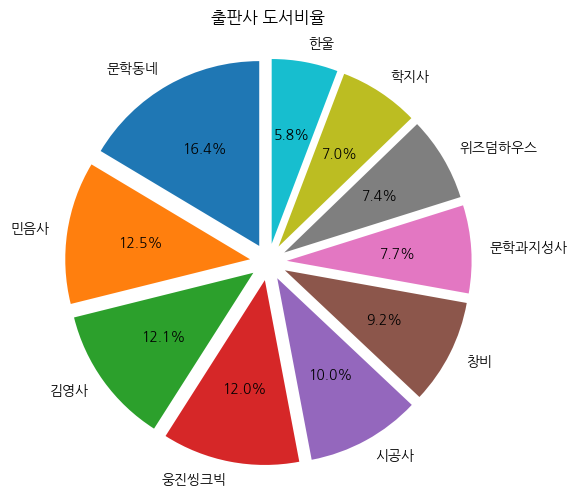

In [97]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(data, labels=labels, startangle=90,
       # autopct=비율 표시, explode=떨어뜨리기 원하는 조각을 0.1 로 지정
       autopct='%.1f%%', explode=[0.1]+[0.1]*9)
ax.set_title('출판사 도서비율')
fig.show()

## 여러 종류의 그래프가 있는 서브플롯 그리기

/var/folders/f2/hb4qppmx35lfxbhy2zgtc6640000gn/T/ipykernel_94573/1281370616.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


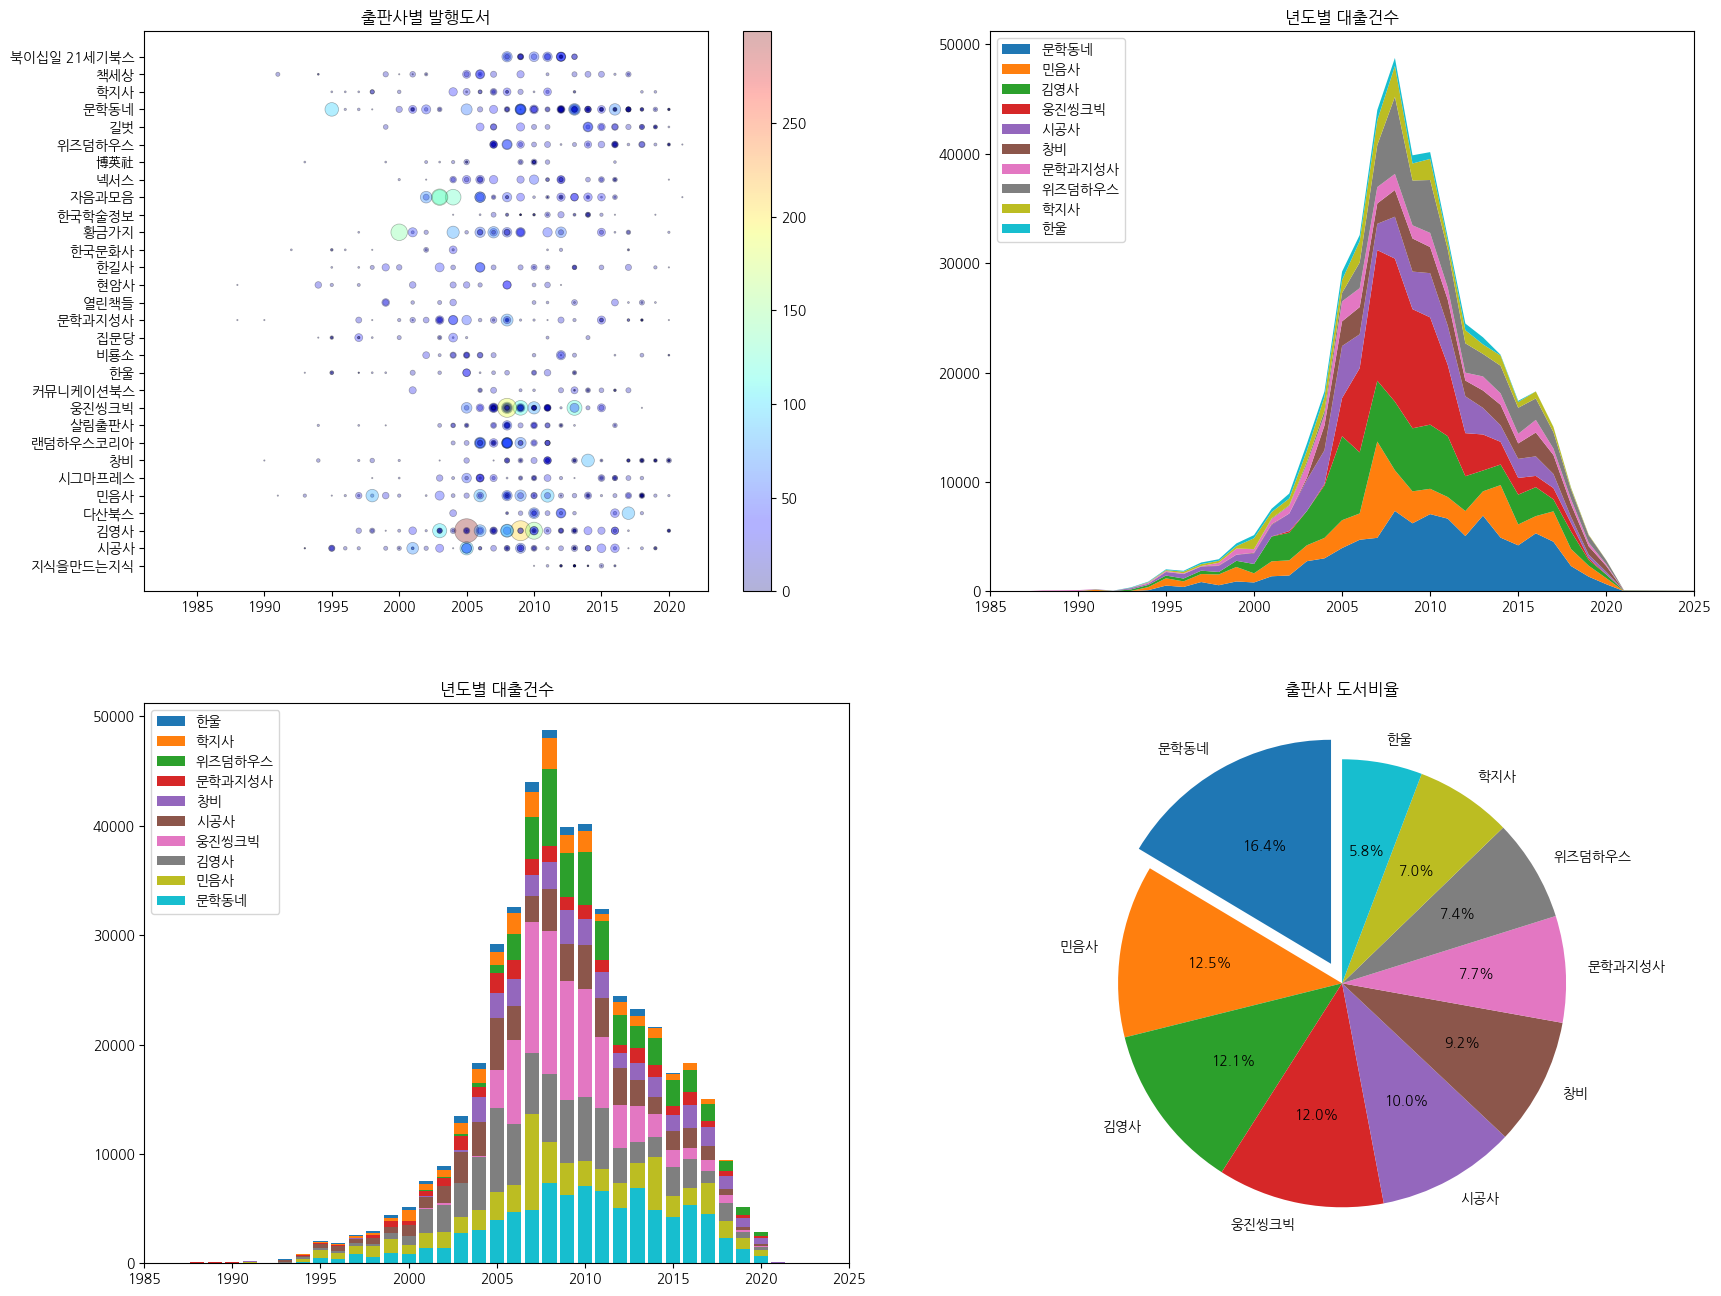

In [72]:
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# 산점도
ns_book8 = ns_book7[top30_pubs_idx].sample(1000, random_state=42)
sc = axes[0, 0].scatter(ns_book8['발행년도'], ns_book8['출판사'], 
                        linewidths=0.5, edgecolors='k', alpha=0.3,
                        s=ns_book8['대출건수'], c=ns_book8['대출건수'], cmap='jet')
axes[0, 0].set_title('출판사별 발행도서')
fig.colorbar(sc, ax=axes[0, 0])

# 스택 선 그래프
axes[0, 1].stackplot(year_cols, ns_book10.loc[top10_pubs].fillna(0), 
                     labels=top10_pubs)
axes[0, 1].set_title('년도별 대출건수')
axes[0, 1].legend(loc='upper left')
axes[0, 1].set_xlim(1985, 2025)

# 스택 막대 그래프
for i in reversed(range(len(ns_book12))):
    bar = ns_book12.iloc[i]     # 행 추출
    label = ns_book12.index[i]  # 출판사 이름 추출
    axes[1, 0].bar(year_cols, bar, label=label)
axes[1, 0].set_title('년도별 대출건수')
axes[1, 0].legend(loc='upper left')
axes[1, 0].set_xlim(1985, 2025)

# 원 그래프
axes[1, 1].pie(data, labels=labels, startangle=90,
               autopct='%.1f%%', explode=[0.1]+[0]*9)
axes[1, 1].set_title('출판사 도서비율')

fig.savefig('all_in_one.png')
fig.show()

## 판다스로 여러 개의 그래프 그리기

### 스택 영역 그래프 그리기

In [73]:
ns_book11 = ns_book9.pivot_table(index='발행년도', columns='출판사', values='대출건수')
ns_book11.loc[2000:2005]

출판사,博英社,길벗,김영사,넥서스,다산북스,랜덤하우스코리아,문학과지성사,문학동네,민음사,북이십일 21세기북스,...,창비,책세상,커뮤니케이션북스,학지사,한국문화사,한국학술정보,한길사,한울,현암사,황금가지
발행년도,,,,,,,,,,,,,,,,,,,,,
2000,237.0,7.0,854.0,194.0,NaN,3.0,316.0,806.0,836.0,NaN,...,57.0,369.0,37.0,988.0,84.0,36.0,536.0,287.0,274.0,1152.0
2001,267.0,202.0,2269.0,228.0,NaN,17.0,449.0,1373.0,1363.0,NaN,...,70.0,355.0,184.0,582.0,110.0,3.0,1626.0,305.0,481.0,722.0
2002,458.0,472.0,2525.0,1154.0,NaN,20.0,686.0,1442.0,1388.0,NaN,...,0.0,794.0,80.0,625.0,134.0,47.0,777.0,450.0,398.0,1493.0
2003,444.0,795.0,3130.0,3069.0,NaN,489.0,1262.0,2750.0,1453.0,NaN,...,191.0,289.0,110.0,1006.0,215.0,95.0,1114.0,636.0,471.0,2001.0
2004,630.0,976.0,4804.0,2355.0,212.0,618.0,952.0,3012.0,1864.0,42.0,...,2268.0,637.0,476.0,1270.0,392.0,91.0,1318.0,502.0,661.0,2744.0
2005,788.0,2162.0,7684.0,1162.0,509.0,941.0,1827.0,3952.0,2546.0,NaN,...,2256.0,1103.0,820.0,1179.0,243.0,123.0,1461.0,767.0,835.0,2593.0


In [74]:
import numpy as np

ns_book11 = ns_book7[top30_pubs_idx].pivot_table(
    index='발행년도', columns='출판사', 
    values='대출건수', aggfunc=np.sum)
ns_book11.loc[2000:2005]

출판사,博英社,길벗,김영사,넥서스,다산북스,랜덤하우스코리아,문학과지성사,문학동네,민음사,북이십일 21세기북스,...,창비,책세상,커뮤니케이션북스,학지사,한국문화사,한국학술정보,한길사,한울,현암사,황금가지
발행년도,,,,,,,,,,,,,,,,,,,,,
2000,237.0,7.0,854.0,194.0,NaN,3.0,316.0,806.0,836.0,NaN,...,57.0,369.0,37.0,988.0,84.0,36.0,536.0,287.0,274.0,1152.0
2001,267.0,202.0,2269.0,228.0,NaN,17.0,449.0,1373.0,1363.0,NaN,...,70.0,355.0,184.0,582.0,110.0,3.0,1626.0,305.0,481.0,722.0
2002,458.0,472.0,2525.0,1154.0,NaN,20.0,686.0,1442.0,1388.0,NaN,...,0.0,794.0,80.0,625.0,134.0,47.0,777.0,450.0,398.0,1493.0
2003,444.0,795.0,3130.0,3069.0,NaN,489.0,1262.0,2750.0,1453.0,NaN,...,191.0,289.0,110.0,1006.0,215.0,95.0,1114.0,636.0,471.0,2001.0
2004,630.0,976.0,4804.0,2355.0,212.0,618.0,952.0,3012.0,1864.0,42.0,...,2268.0,637.0,476.0,1270.0,392.0,91.0,1318.0,502.0,661.0,2744.0
2005,788.0,2162.0,7684.0,1162.0,509.0,941.0,1827.0,3952.0,2546.0,NaN,...,2256.0,1103.0,820.0,1179.0,243.0,123.0,1461.0,767.0,835.0,2593.0


/var/folders/f2/hb4qppmx35lfxbhy2zgtc6640000gn/T/ipykernel_94573/1633203849.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


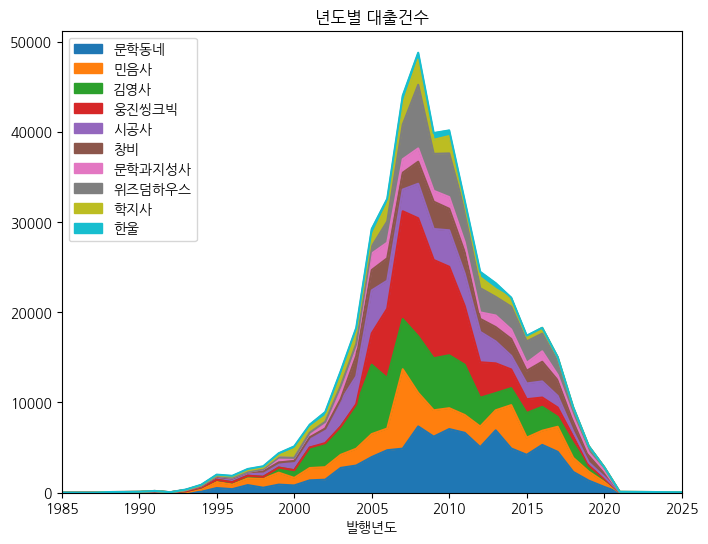

In [75]:
fig, ax = plt.subplots(figsize=(8, 6))
ns_book11[top10_pubs].plot.area(ax=ax, title='년도별 대출건수',
                                xlim=(1985, 2025))
ax.legend(loc='upper left')
fig.show()

### 스택 막대 그래프 그리기

/var/folders/f2/hb4qppmx35lfxbhy2zgtc6640000gn/T/ipykernel_94573/261850259.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


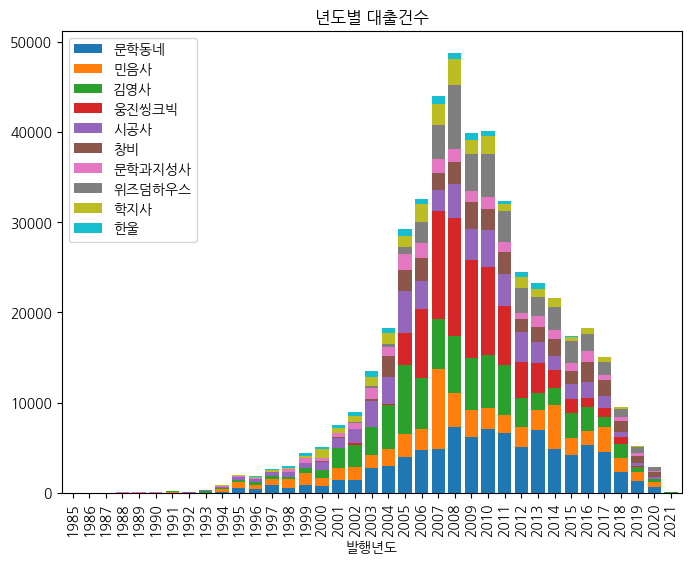

In [76]:
fig, ax = plt.subplots(figsize=(8, 6))
ns_book11.loc[1985:2025, top10_pubs].plot.bar(
    ax=ax, title='년도별 대출건수', stacked=True, width=0.8)
ax.legend(loc='upper left')
fig.show()